# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 6

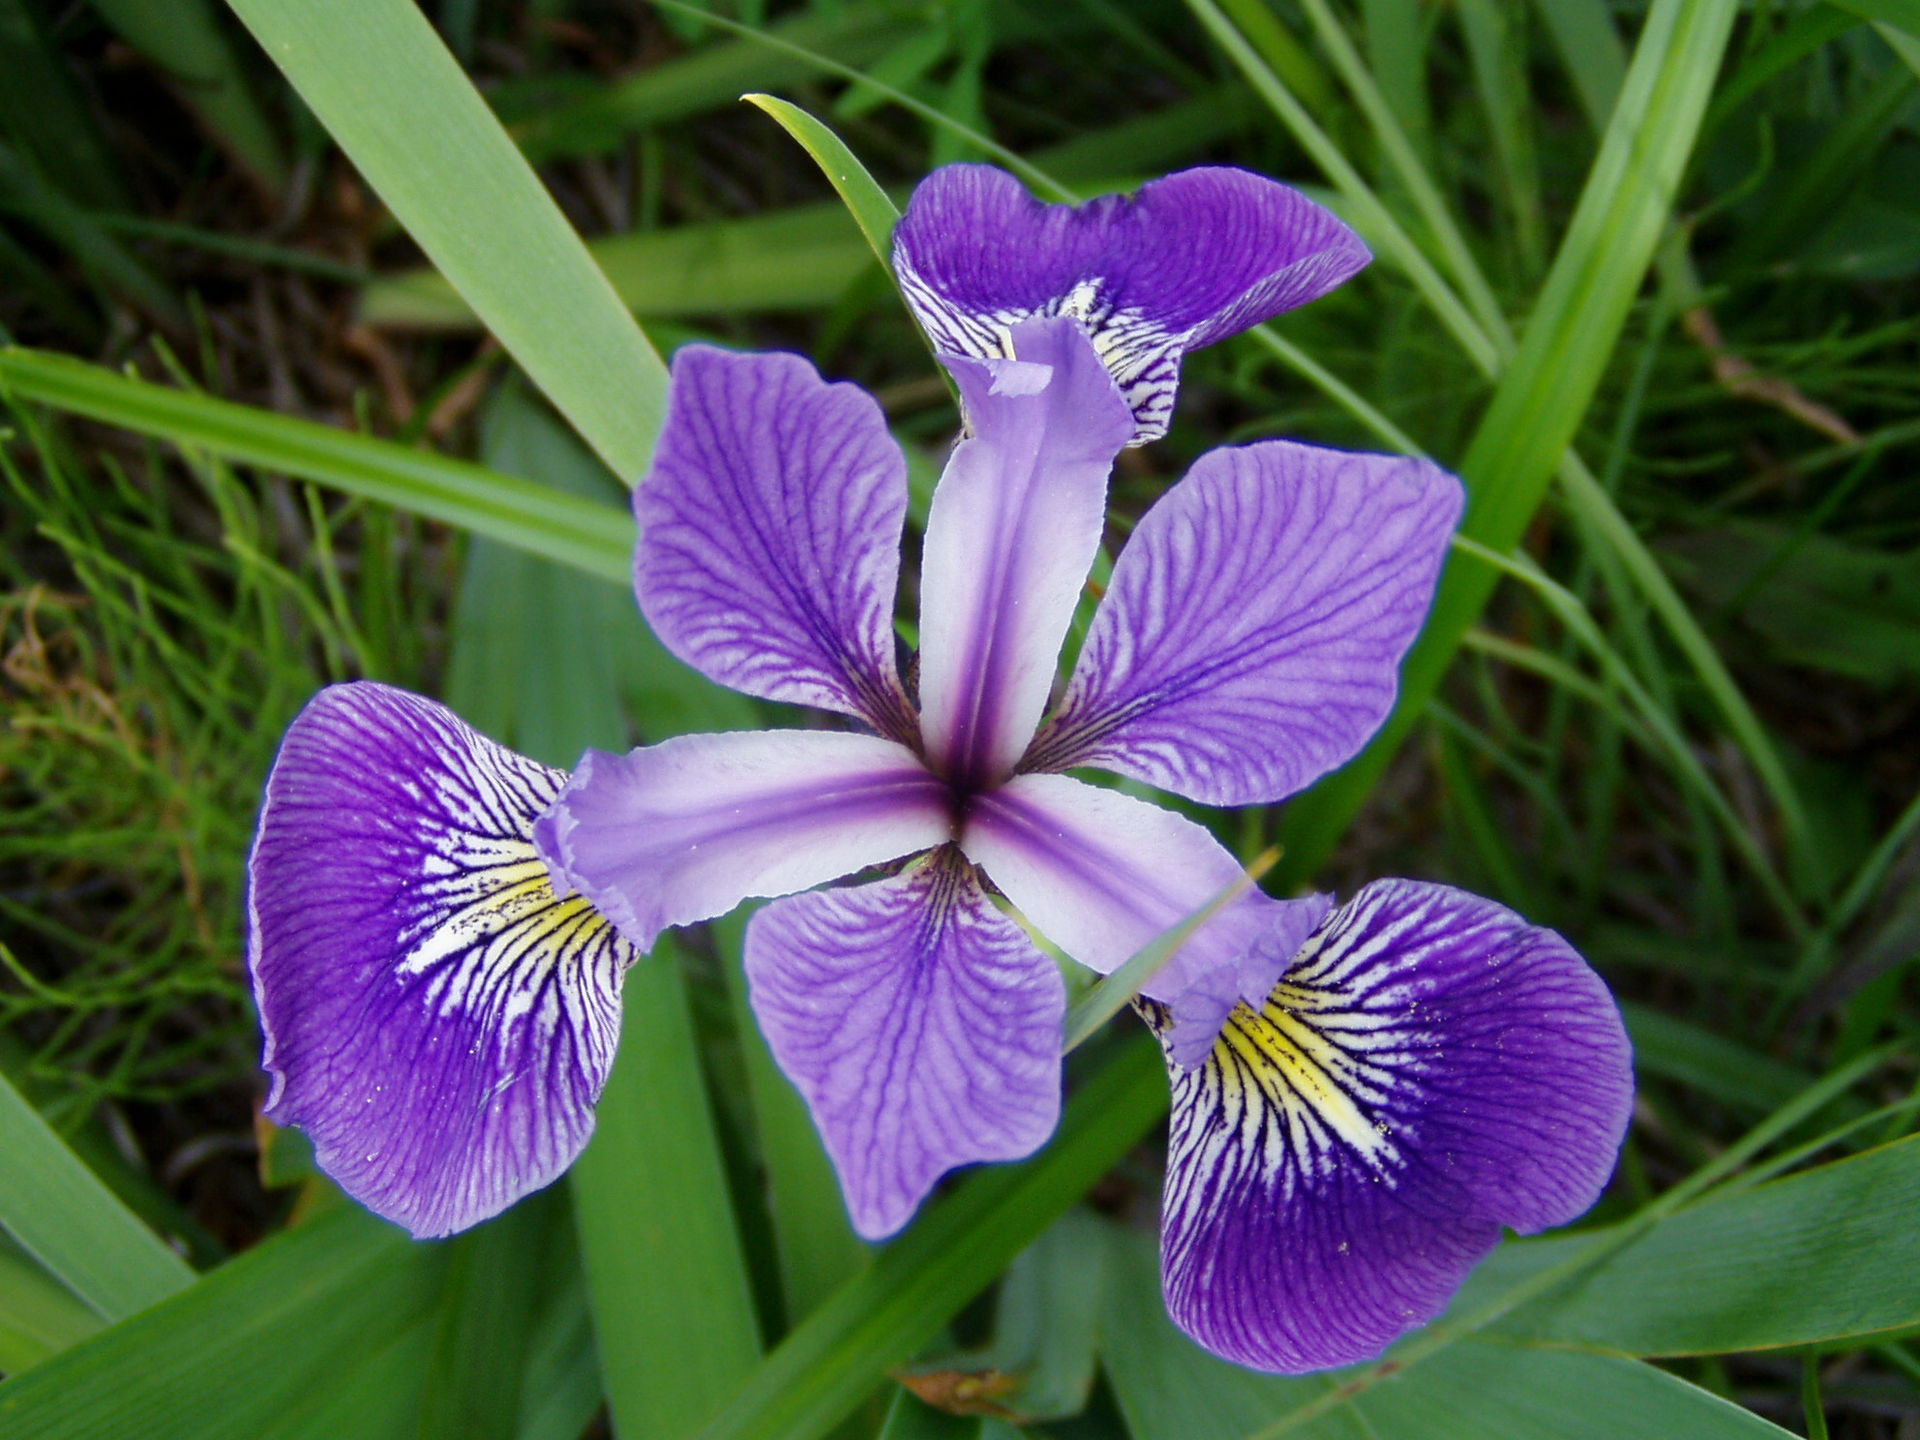

In this lab we will cover material from lecture 6. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 6' in teams. Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 6. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 6' en teams. Je vous souhaite un beau laboratoire!

# Q1: Logistic Regression

First of all let's load the IRIS dataset https://en.wikipedia.org/wiki/Iris_flower_data_set

---------------

Tout d'abord, chargeons l'ensemble de données IRIS https://en.wikipedia.org/wiki/Iris_flower_data_set

Shape of training data is =  torch.Size([50, 2])
Shape of test data is =  torch.Size([50, 2])
Training labels tensor([1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.])
Test labels tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.])


Text(0, 0.5, 'Petal_width')

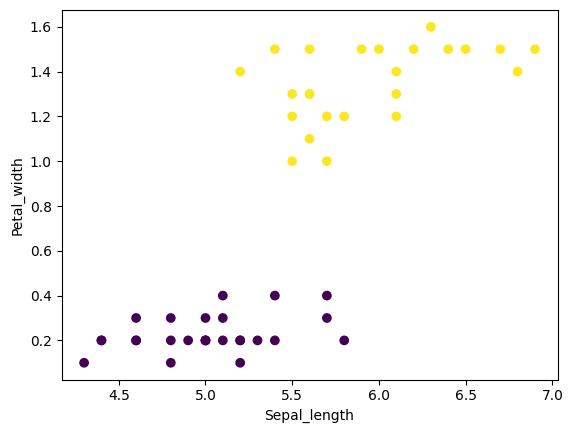

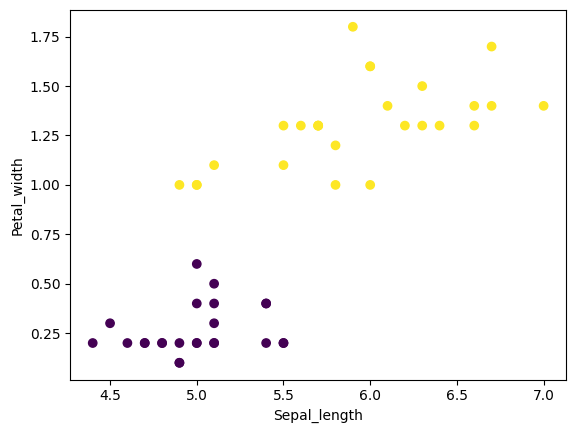

In [13]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import torch

np.random.seed(2)

iris = load_iris()

# get the labels for classes 0 and 1
inds = iris['target'] < 2
data = iris['data'][inds].squeeze()
targets = iris['target'][inds].squeeze()

# shuffle
N = data.shape[0]
rng = np.random.default_rng(seed=2)
shuffle_vector = np.arange(N)
rng.shuffle(shuffle_vector)

data_sh = data[shuffle_vector]
targets_sh = targets[shuffle_vector]

# do the training test split
splitpt = int(N*0.5)

tr_dt = torch.from_numpy(data_sh[:splitpt, [0, 3]]).float()
test_dt = torch.from_numpy(data_sh[splitpt:, [0, 3]]).float()

print('Shape of training data is = ', tr_dt.shape)
print('Shape of test data is = ', test_dt.shape)

tr_targets = torch.from_numpy(targets_sh[:splitpt]).float()
test_targets = torch.from_numpy(targets_sh[splitpt:]).float()

print('Training labels', tr_targets)
print('Test labels', test_targets)

plt.figure()
plt.scatter(tr_dt[:, 0], tr_dt[:, 1], c=tr_targets, label='training data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')

plt.figure()
plt.scatter(test_dt[:, 0], test_dt[:, 1], c=test_targets, label='test data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')

## Q1.a Implement Logistic Regression (25pt)

Implement Logistic Regression from scratch. (Do not use Pytorch) Use the gradient expression we derived in slide 38, and do the gradient descent steps such that, $$w_{t+1} = w_t - \eta \nabla_w \mathcal L(w).$$

Note that, $\frac{\partial \mathcal L(w, b)}{\partial w} = \frac{1}{N}\sum_n  \left( \sigma(w^\top x_n +b) - y_n \right) x_n$, and $\frac{\partial \mathcal L(w, b)}{\partial b} = \frac{1}{N} \sum_n  \left( \sigma(w^\top x_n +b) - y_n \right)$.

Hint: Note that you can just concatenate a one to each data item, and compactly represent everything in the $w$ vector. Use a learning rate of $\eta = 0.1$.

--------------------

## Q1.a Implémenter la régression logistique (25 pts)

Implémentez la régression logistique à partir de zéro. (N'utilisez pas Pytorch) Utilisez l'expression de gradient que nous avons dérivée dans la diapositive 38 et effectuez les étapes de descente de gradient telles que $$w_{t+1} = w_t - \eta \nabla_w \mathcal L(w).$$

Notez que $\frac{\partial \mathcal L(w, b)}{\partial w} = \frac{1}{N}\sum_n \left( \sigma(w^\top x_n +b) - y_n \right) x_n$, et $\frac{\partial \mathcal L(w, b)}{\partial b} = \frac{1}{N} \sum_n \left( \sigma(w^\top x_n + b) - y_n \right)$.

Astuce : notez que vous pouvez simplement en concaténer un à chaque élément de données et représenter de manière compacte tout dans le vecteur $w$. Utilisez un taux d'apprentissage de $\eta = 0,1$



In [14]:
import torch.nn as nn

learningRate=0.1

class logreg(nn.Module):
    def __init__(self):
        # the model definition
        super().__init__()
        self.w = nn.parameter.Parameter(0.01*torch.rand(3), requires_grad=True)

    def forward(self, x, pad=True):
        # pad zeros
        if pad:
            x = torch.cat([x, torch.ones(x.shape[0], 1)], dim=-1)

        # implement the forward pass
        f = x@self.w 
        y = torch.sigmoid(f)
        return y.squeeze(), x

model = logreg()
eps = 1e-10


for e in range(1000):
  # do the forward pass
  out, x_padded = model.forward(tr_dt)
  # calculate the gradient
  grad = ((out - tr_targets) @ x_padded)/tr_dt.shape[0] 

  # do the GD update
  model.w.data = -learningRate*grad

  # calculate and print the loss
  loss = -(tr_targets * torch.log(out+eps) + (1-tr_targets)*torch.log(1-out+eps)).mean()
  print('ep {} loss val {}'.format(e, loss.item()))




ep 0 loss val 0.6908098459243774
ep 1 loss val 0.6857539415359497
ep 2 loss val 0.6863157153129578
ep 3 loss val 0.685863733291626
ep 4 loss val 0.6862067580223083
ep 5 loss val 0.6859228610992432
ep 6 loss val 0.6861421465873718
ep 7 loss val 0.6859631538391113
ep 8 loss val 0.6861029863357544
ep 9 loss val 0.6859898567199707
ep 10 loss val 0.6860789656639099
ep 11 loss val 0.6860072612762451
ep 12 loss val 0.686063826084137
ep 13 loss val 0.6860184669494629
ep 14 loss val 0.6860544681549072
ep 15 loss val 0.6860256791114807
ep 16 loss val 0.6860485076904297
ep 17 loss val 0.6860302686691284
ep 18 loss val 0.6860447525978088
ep 19 loss val 0.6860332489013672
ep 20 loss val 0.6860424876213074
ep 21 loss val 0.6860350966453552
ep 22 loss val 0.6860409379005432
ep 23 loss val 0.6860362887382507
ep 24 loss val 0.6860399842262268
ep 25 loss val 0.6860370635986328
ep 26 loss val 0.6860394477844238
ep 27 loss val 0.6860374212265015
ep 28 loss val 0.6860389709472656
ep 29 loss val 0.686037838

## Q1b. Calculate the training and test accuracies (5pt)

Simply calculate the training and test accuracies. Classification accuracy is defined as $\frac{\text{number of correct classifications}}{\text{Total number items classified}}$.

--------------

## Q1b. Calculer les précisions de formation et de test (5pt)

Calculez simplement les précisions de la formation et des tests. La précision de la classification est définie comme $\frac{\text{nombre de classifications correctes}}{\text{Nombre total d'éléments classés}}$


In [15]:
# the training outputs
out,_ = model.forward(tr_dt)
out = torch.round(out.data)

# calculate the training accuracy
tr_acc = (out == tr_targets).sum().float().item()/tr_targets.shape[0]
print(tr_acc)

# test outputs
out_test,_ = model.forward(test_dt)
out_test = torch.round(out_test)

# calculate the test accuracy
test_acc = (out_test == test_targets).sum().float().item()/test_targets.shape[0]
print(test_acc)


0.48
0.52


# Q1c. Visualize the decision boundary (5pt)

Evaluate the classifier output at each point from the range $x \in [4, 7]$, and $y \in [0, 2]$.

--------------

# Q1c. Visualisez la limite de décision (5pt)

Évaluez la sortie du classificateur à chaque point de la plage $x \in [4, 7]$ et $y \in [0, 2]$.



Text(0, 0.5, 'Petal_width')

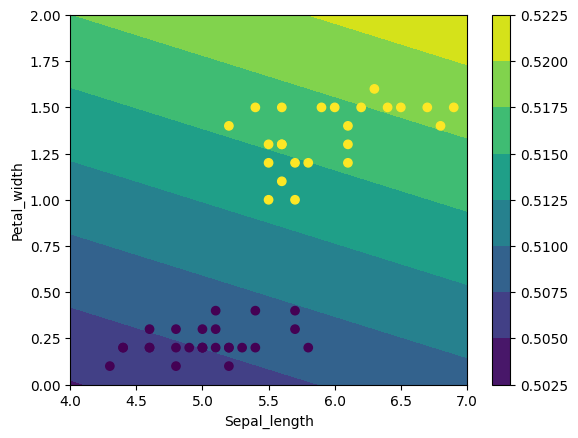

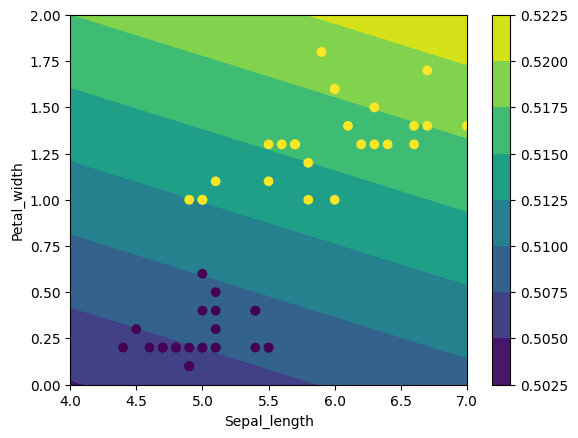

In [16]:
Npts = 100
x = np.linspace(4, 7, Npts)
y = np.linspace(0, 2, Npts)

X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
pos = torch.from_numpy(pos).float()

outs, _ = model.forward(pos.reshape(-1, 2), pad=True)
out = outs.reshape(Npts, Npts)

# plot training data
plt.figure()
plt.contourf(X, Y, out.data)
plt.colorbar()
plt.scatter(tr_dt[:, 0], tr_dt[:, 1], c=tr_targets, label='training data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')

# plot test data
plt.figure()
plt.contourf(X, Y, out.data)
plt.colorbar()
plt.scatter(test_dt[:, 0], test_dt[:, 1], c=test_targets, label='training data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')




## Q1.d Now do the same learning with pytorch (15pt)

Now, do the same optimization with pytorch.

Do you get the same classification accuracies.

Do you observe the same gradient values?

----------

## Q1.d Faites maintenant le même apprentissage avec pytorch (15pt)

Maintenant, faites la même optimisation avec pytorch.

Obtenez-vous les mêmes précisions de classification.

Observez-vous les mêmes valeurs de gradient

In [17]:
model = logreg()
opt = torch.optim.SGD(model.parameters(), lr=1e-1)

for e in range(1000):
  opt.zero_grad()
  # do the forward pass
  out, x_padded = model.forward(tr_dt)
  # calculate the gradient
  loss = -(tr_targets * torch.log(out+eps) + (1-tr_targets)*torch.log(1-out+eps)).mean()

  # do the backward pass on the loss
  loss.backward()

  # manual gradient
  grad = (x_padded.t() @ (out - tr_targets))/tr_dt.shape[0]

  # pytorch gradient
  pt_grad = model.w.grad

  # should be close to zero
  print('grad difference', (grad - pt_grad).abs().sum() )

  # take the optimizer step
  opt.step()
  # calculate and print the loss
  print('ep {} loss val {}'.format(e, loss.item()))


########## Calculate the accuracies

# the training outputs
out,_ = model.forward(tr_dt)
out = torch.round(out.data)

# calculate the training accuracy
tr_acc = (out == tr_targets).sum().float().item()/tr_targets.shape[0]
print('Train accuracy is = ', tr_acc)

# test outputs
out_test,_ = model.forward(test_dt)
out_test = torch.round(out_test)

# calculate the test accuracy
test_acc =(out_test==test_targets).sum().float().item()/test_targets.shape[0]
print('Test accuracy is =', test_acc)

grad difference tensor(1.1548e-07, grad_fn=<SumBackward0>)
ep 0 loss val 0.6924871802330017
grad difference tensor(1.0803e-07, grad_fn=<SumBackward0>)
ep 1 loss val 0.6857014298439026
grad difference tensor(5.4017e-08, grad_fn=<SumBackward0>)
ep 2 loss val 0.6796373128890991
grad difference tensor(1.0617e-07, grad_fn=<SumBackward0>)
ep 3 loss val 0.6736776232719421
grad difference tensor(1.6019e-07, grad_fn=<SumBackward0>)
ep 4 loss val 0.6677958965301514
grad difference tensor(1.3039e-08, grad_fn=<SumBackward0>)
ep 5 loss val 0.6619898080825806
grad difference tensor(9.3132e-08, grad_fn=<SumBackward0>)
ep 6 loss val 0.6562586426734924
grad difference tensor(3.1665e-08, grad_fn=<SumBackward0>)
ep 7 loss val 0.6506012082099915
grad difference tensor(1.2480e-07, grad_fn=<SumBackward0>)
ep 8 loss val 0.6450164914131165
grad difference tensor(8.0094e-08, grad_fn=<SumBackward0>)
ep 9 loss val 0.639503538608551
grad difference tensor(1.4342e-07, grad_fn=<SumBackward0>)
ep 10 loss val 0.63406

# Q2 More challenging Iris Data (50pt)

Now let's create a binary decision problem in which linear discriminator is not sufficient.

--------

# Q2 Données Iris plus difficiles (50pt)

Créons maintenant un problème de décision binaire dans lequel le discriminateur linéaire n'est pas suffisant.

Shape of training data is =  torch.Size([75, 2])
Shape of test data is =  torch.Size([25, 2])
Training labels tensor([1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 1., 1.])
Test labels tensor([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 0., 1., 1.])


Text(0, 0.5, 'Petal_width')

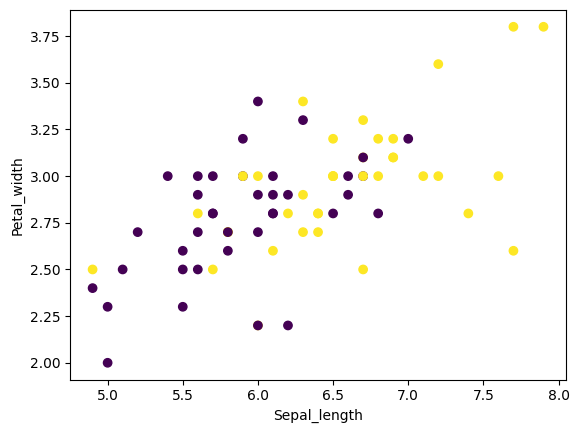

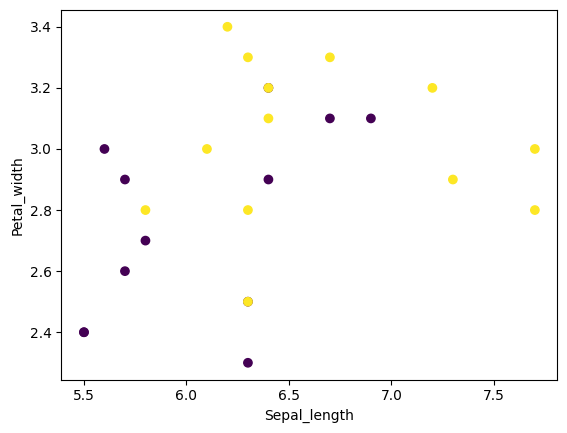

In [18]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import torch

np.random.seed(2)

iris = load_iris()

# get the labels for classes 0 and 1
inds = iris['target'] >= 1
data = iris['data'][inds].squeeze()
targets = iris['target'][inds].squeeze()

# shuffle
N = data.shape[0]
rng = np.random.default_rng(seed=2)
shuffle_vector = np.arange(N)
rng.shuffle(shuffle_vector)

data_sh = data[shuffle_vector]
targets_sh = targets[shuffle_vector]

# do the training test split
splitpt = int(N*0.75)

tr_dt = torch.from_numpy(data_sh[:splitpt, [0, 1]]).float()
test_dt = torch.from_numpy(data_sh[splitpt:, [0, 1]]).float()

print('Shape of training data is = ', tr_dt.shape)
print('Shape of test data is = ', test_dt.shape)

tr_targets = torch.from_numpy(targets_sh[:splitpt]).float() - 1.0
test_targets = torch.from_numpy(targets_sh[splitpt:]).float() - 1.0

print('Training labels', tr_targets)
print('Test labels', test_targets)

plt.figure()
plt.scatter(tr_dt[:, 0], tr_dt[:, 1], c=tr_targets, label='training data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')

plt.figure()
plt.scatter(test_dt[:, 0], test_dt[:, 1], c=test_targets, label='test data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')

## Q2.a Implement Kernel Logistic Regression

Implement the Kernel Logistic Regression Model Described in slide 46.

Namely, construct an classifier model so that, $f(x) = \sigma(\sum_n a_n k(x, x_n))$, where the $n$ index runs over the training examples, and $x$ is the input features. Use an rbf kernel, such that $k(x, x_n) = \exp( - \gamma \| x - x_n\|)$. Train this model with pytorch. Visualize the decision boundary as before, calculate the training / testing accuracies. Use $\gamma = 10$

------------------

## Q2.a Implémenter la régression logistique du noyau

Implémentez le modèle de régression logistique du noyau décrit dans la diapositive 46.

À savoir, construisez un modèle de classificateur de sorte que $f(x) = \sigma(\sum_n a_n k(x, x_n))$, où l'index $n$ parcourt les exemples de formation et $x$ correspond aux fonctionnalités d'entrée. . Utilisez un noyau RBF, tel que $k(x, x_n) = \exp( - \gamma \| x - x_n\|)$. Entraînez ce modèle avec pytorch. Visualisez la limite de décision comme avant, calculez les précisions de formation/test. Utilisez $\gamma = 10$.

In [20]:
class kernellogreg(nn.Module):
    def __init__(self, N=100, kernel='rbf', gamma=1):
        super().__init__()
        self.a = nn.Linear(N, 1)
        self.gamma = gamma

    def forward(self, x, X, pad=False):
        K =torch.exp(-self.gamma*torch.cdist(x, X)**2)
        f = K @ self.a.weight.T
        y = torch.sigmoid(f)
        return y.squeeze()

model = kernellogreg(N=tr_dt.shape[0], gamma=10)
opt = torch.optim.SGD(params=model.parameters(), lr=1e-2)

for e in range(20000):
    opt.zero_grad()
    out = model.forward(tr_dt, tr_dt)

    loss = -(tr_targets*torch.log(out+eps) + (1-tr_targets)*torch.log(1-out+eps)).mean()

    # do the backward pass
    loss.backward()
    # take the optimizer step
    opt.step()

    print('ep {} loss value {}'.format(e, loss.item()))





ep 0 loss value 0.6816639304161072
ep 1 loss value 0.6812916398048401
ep 2 loss value 0.6809220314025879
ep 3 loss value 0.6805549263954163
ep 4 loss value 0.6801903247833252
ep 5 loss value 0.6798282265663147
ep 6 loss value 0.67946857213974
ep 7 loss value 0.6791113615036011
ep 8 loss value 0.678756594657898
ep 9 loss value 0.6784042119979858
ep 10 loss value 0.6780542731285095
ep 11 loss value 0.677706778049469
ep 12 loss value 0.6773615479469299
ep 13 loss value 0.6770186424255371
ep 14 loss value 0.6766780614852905
ep 15 loss value 0.6763398051261902
ep 16 loss value 0.6760038733482361
ep 17 loss value 0.6756700873374939
ep 18 loss value 0.675338625907898
ep 19 loss value 0.6750093698501587
ep 20 loss value 0.6746824383735657
ep 21 loss value 0.674357533454895
ep 22 loss value 0.674034833908081
ep 23 loss value 0.6737143397331238
ep 24 loss value 0.6733959913253784
ep 25 loss value 0.673079788684845
ep 26 loss value 0.6727657318115234
ep 27 loss value 0.6724536418914795
ep 28 loss

0.8133333333333334
0.68


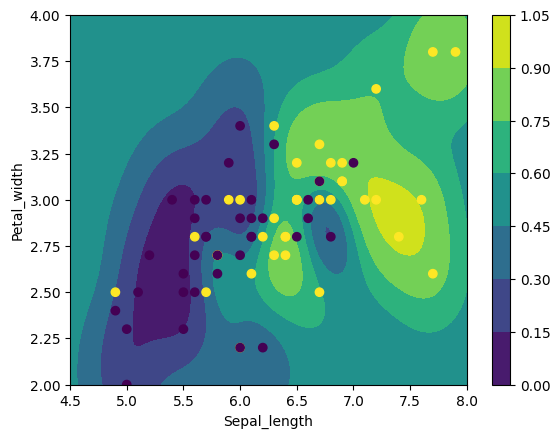

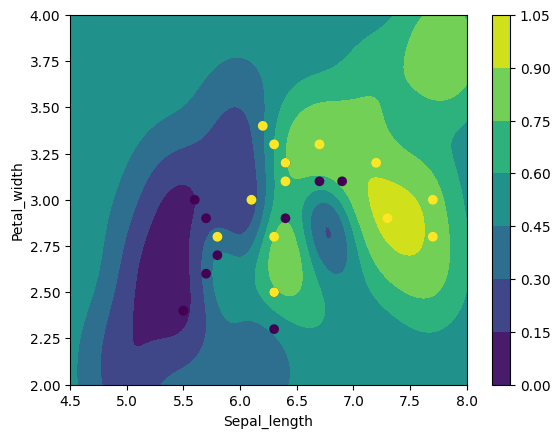

In [22]:
Npts = 100
x = np.linspace(4.5, 8, Npts)
y = np.linspace(2, 4, Npts)

X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
pos = torch.from_numpy(pos).float()

outs = model.forward(pos.reshape(-1, 2), tr_dt)
out = outs.reshape(Npts, Npts)

# plot training data
plt.figure()
plt.contourf(X, Y, out.data)
plt.colorbar()
plt.scatter(tr_dt[:, 0], tr_dt[:, 1], c=tr_targets, label='training data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')

# plot test data
plt.figure()
plt.contourf(X, Y, out.data)
plt.colorbar()
plt.scatter(test_dt[:, 0], test_dt[:, 1], c=test_targets, label='training data')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')


##### calculate the accuracies
out = model.forward(tr_dt, tr_dt)
out = torch.round(out.data)

# calculate the training accuracy
tr_acc = (out == tr_targets).sum().float().item()/tr_targets.shape[0]
print(tr_acc)

# test outputs
out_test =  model.forward(test_dt, tr_dt)
out_test = torch.round(out_test)

# calculate the test accuracy
test_acc = (out_test == test_targets).sum().float().item()/test_targets.shape[0]
print(test_acc)




## Q2.b Explore the effect of the $\gamma$ parameter and comment (Bonus, 30 pt)

Change the kernel width parameter. How does it effect the training accuracy? How does it effect the testing accuracy?

-----------------

## Q2.b Explorez l'effet du paramètre $\gamma$ et commentez (Bonus, 30 pt)

Modifiez le paramètre de largeur du noyau. Comment cela affecte-t-il la précision de l’entraînement ? Comment cela affecte-t-il la précision des tests




In [29]:
from tqdm.notebook import tqdm
gammas = [0,5,10,15,20,30,50,70,100]
models = []
optims = []
results = {}
for g in gammas:
    model = kernellogreg(N=tr_dt.shape[0], gamma=g)
    opt = torch.optim.SGD(params=model.parameters(), lr=1e-2)
    models.append(model)
    optims.append(opt)

for model, opt in zip(models, optims):
    for e in tqdm(range(20000), desc='Train of model with gamma = {}'.format(model.gamma)):
        opt.zero_grad()
        out = model.forward(tr_dt, tr_dt)

        loss = -(tr_targets*torch.log(out+eps) + (1-tr_targets)*torch.log(1-out+eps)).mean()

        # do the backward pass
        loss.backward()
        # take the optimizer step
        opt.step()

    out = model.forward(tr_dt, tr_dt)
    out = torch.round(out.data)

    # calculate the training accuracy
    tr_acc = (out == tr_targets).sum().float().item()/tr_targets.shape[0]
    print('gamma = {} train accuracy = {}'.format(model.gamma, tr_acc))

    # test outputs
    out_test = model.forward(test_dt, tr_dt)
    out_test = torch.round(out_test)

    # calculate the test accuracy
    test_acc = (out_test == test_targets).sum().float().item()/test_targets.shape[0]
    print('gamma = {} test accuracy = {}'.format(model.gamma, test_acc))
    results[model.gamma] = {'train': tr_acc, 'test': test_acc}

Train of model with gamma = 0:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 0 train accuracy = 0.5066666666666667
gamma = 0 test accuracy = 0.48


Train of model with gamma = 5:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 5 train accuracy = 0.7333333333333333
gamma = 5 test accuracy = 0.64


Train of model with gamma = 10:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 10 train accuracy = 0.8133333333333334
gamma = 10 test accuracy = 0.68


Train of model with gamma = 15:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 15 train accuracy = 0.8
gamma = 15 test accuracy = 0.68


Train of model with gamma = 20:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 20 train accuracy = 0.8133333333333334
gamma = 20 test accuracy = 0.68


Train of model with gamma = 30:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 30 train accuracy = 0.8133333333333334
gamma = 30 test accuracy = 0.68


Train of model with gamma = 50:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 50 train accuracy = 0.8266666666666667
gamma = 50 test accuracy = 0.64


Train of model with gamma = 70:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 70 train accuracy = 0.8933333333333333
gamma = 70 test accuracy = 0.64


Train of model with gamma = 100:   0%|          | 0/20000 [00:00<?, ?it/s]

gamma = 100 train accuracy = 0.92
gamma = 100 test accuracy = 0.64


Text(0, 0.5, 'Accuracy')

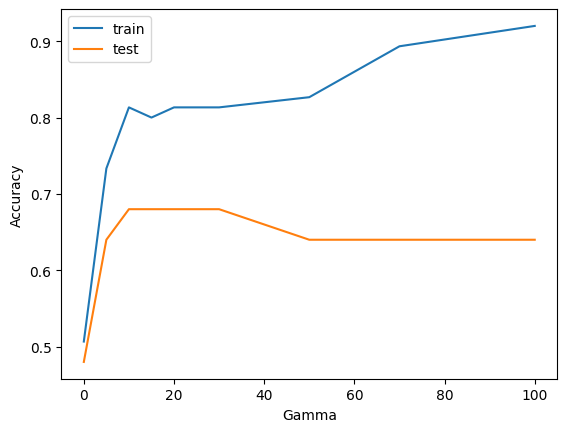

In [32]:
import pandas as pd
df = pd.DataFrame(results).T
df.plot()
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

#### Faible gamma : Le modèle est trop simple et sous-ajuste, ce qui entraîne une faible précision sur l'entraînement et les tests.
#### Gamma moyen : La précision de l'entraînement et des tests s'améliore, indiquant un bon équilibre entre complexité et généralisation.
#### Gamma élevé : Le modèle sur-ajuste, avec une très bonne précision d'entraînement mais une baisse de la précision des tests.